> # Nader Mohamed Elhadedy

## Practical Work 3
prepared by Dr. Hattem el-attar

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.arange(0,20+1)
Y = -1 * X + 2

In [ ]:
print('X:',X)
print('Y:',Y)

X: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Y: [  2   1   0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15
 -16 -17 -18]


#### Plot your data points. 

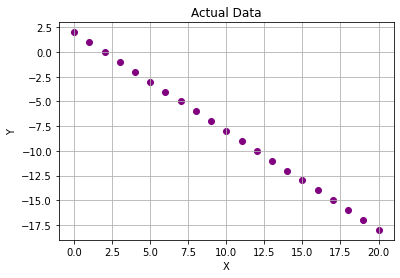

In [ ]:
plt.scatter(X,Y,color='purple')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Actual Data")
plt.grid()
plt.show()

#### **Step_1:** Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [ ]:
def gradient_descent(x_data, y_data, alpha, itrs):

    # handling inputs
    X = x_data
    Y = y_data
    L = alpha

    # initializing variables
    theta_0 = 0
    theta_1 = 0
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []

    for i in range(itrs):

        Y_pred = theta_0 + theta_1 * X
        theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
        theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)

        theta_0 = theta_0 - L * theta0_grd
        theta_1 = theta_1 - L * theta1_grd

        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        H = theta_0 + theta_1 * X
        hypothesis_output.append(H)

        J_val = (1/(2*len(X))) * np.sum((H - Y)**2)
        loss_list.append(J_val)

    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list

In [ ]:
trial = gradient_descent(X, Y, 0.0005, 60)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

-0.04491479563310586 -0.8381527261772723


In [ ]:
def R2_score(actudal_y_data, final_predicted_y_data):
    
    SStot = np.sum((actudal_y_data - np.mean(actudal_y_data))**2)
    SSres = np.sum((actudal_y_data - final_predicted_y_data)**2)
    R2 = 1 - (SSres / SStot)

    return R2

In [ ]:
Y_pred_final = trial[4][-1]

R2_score(Y, Y_pred_final)

0.9688458373654824

In [ ]:
def plot_loss_curve(listOfLosses):
    plt.plot(list(range(len(listOfLosses))), listOfLosses, '-o', color='purple')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.title("Loss Curve")
    plt.show()

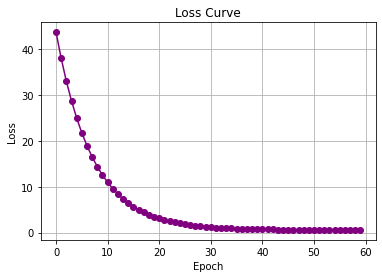

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
def plot_theta_vs_loss(loss_list, theta_list):
    plt.plot(theta_list, loss_list, '-o', color='purple')
    plt.xlabel("Theta")
    plt.ylabel("Loss")
    plt.grid()
    plt.title("Theta vs Loss")
    plt.show()

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

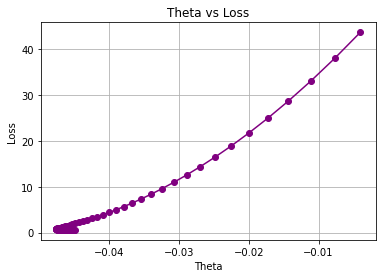

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

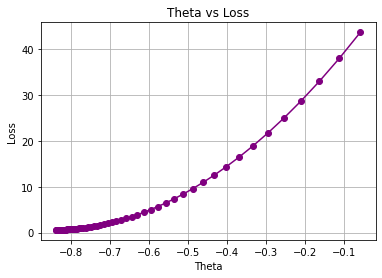

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

In [ ]:
def plot_all_regressions(x_data, y_data, hypothesis_outputs):
    plt.scatter(x_data, y_data, color='purple', label="Actual Data")
    plt.legend()
    plt.xlabel("Original Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    for H in hypothesis_outputs:
        plt.plot(x_data, H, 'r')
    plt.show()

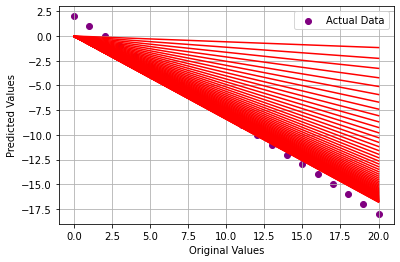

In [ ]:
hypothesis_outputs = trial[4]

plot_all_regressions(X, Y, hypothesis_outputs)

In [ ]:
def plot_best_regression(x_data, y_data, hypothesis_outputs):
    
    plt.scatter(x_data, y_data, color="purple", label="Actual Data")
    plt.xlabel("Original Values")
    plt.ylabel("Predicted Values")
    plt.plot(x_data, hypothesis_outputs[-1], 'r', label="Regression Line")
    plt.legend()
    plt.grid()
    plt.show()

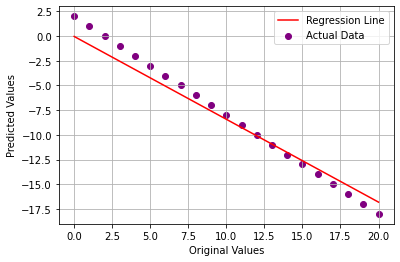

In [ ]:
hypothesis_outputs = trial[4]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

<hr>

<hr>

<hr>

<hr>

<hr>

<hr>

### **Step_2:** Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

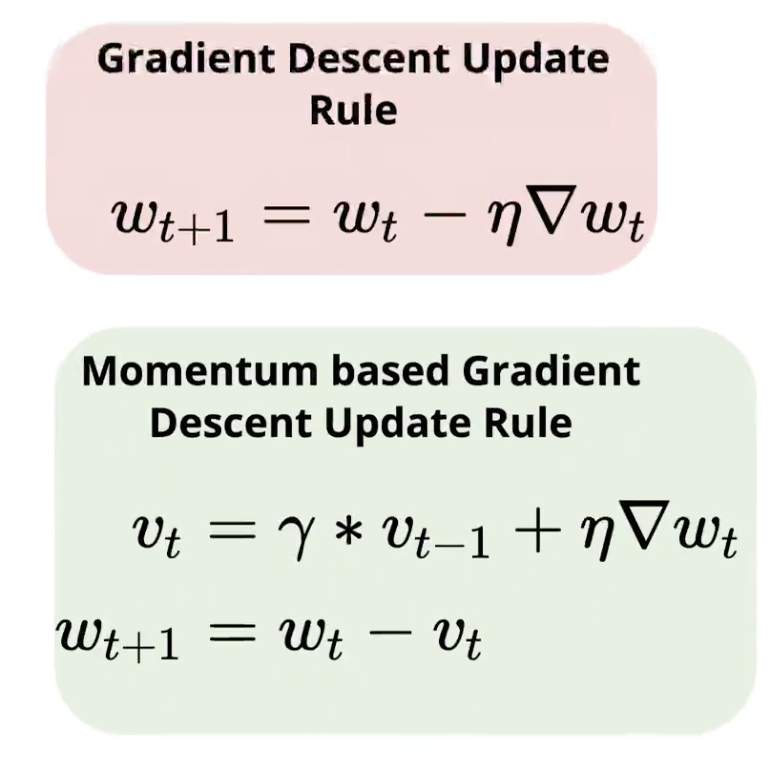

In [ ]:
def gradient_descent_momentum(x_data, y_data, alpha, gamma, itrs):

    # handling inputs
    X = x_data
    Y = y_data
    L = alpha

    # initializing variables
    theta_0 = 0
    theta_1 = 0
    step_size_0 = 0
    step_size_1 = 0
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []

    for i in range(itrs):

        Y_pred = theta_0 + theta_1 * X
        theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
        theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)        
        
        step_size_0 = gamma * step_size_0 + L * theta0_grd
        theta_0 = theta_0 - step_size_0
        
        step_size_1 = gamma * step_size_1 + L * theta1_grd
        theta_1 = theta_1 - step_size_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        H = theta_0 + theta_1 * X
        hypothesis_output.append(H)

        J_val = (1/(2*len(X))) * np.sum((H - Y)**2)
        loss_list.append(J_val)

    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list

In [ ]:
trial = gradient_descent_momentum(X, Y, 0.0005, 0.9, 40)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

0.018853758929582413 -0.9020117911863379


In [ ]:
Y_pred_final = trial[4][-1]

R2_score(Y, Y_pred_final)

0.963056586280302

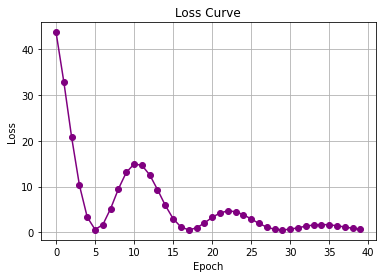

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

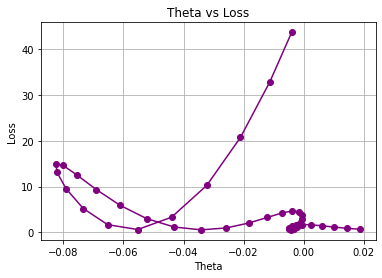

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

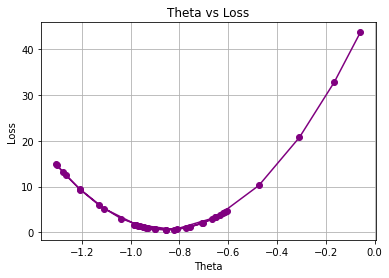

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

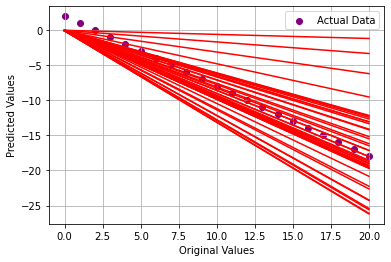

In [ ]:
hypothesis_outputs = trial[4]

plot_all_regressions(X, Y, hypothesis_outputs)

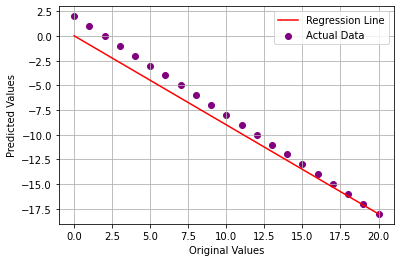

In [ ]:
hypothesis_outputs = trial[4]

plot_best_regression(X, Y, hypothesis_outputs)

#### **Step_3:** Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

<hr>

In [ ]:
# gamma = 0.89
trial = gradient_descent_momentum(X, Y, 0.0005, 0.89, 40)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

0.013797729745296309 -0.894954984361144


In [ ]:
Y_pred_final = trial[4][-1]

R2_score(Y, Y_pred_final)

0.9650846714547519

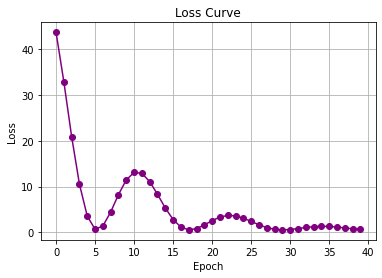

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

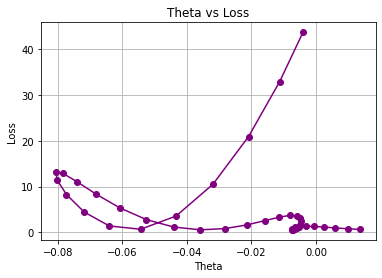

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

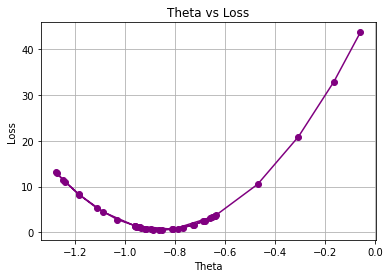

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

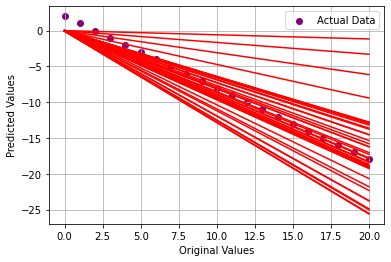

In [ ]:
hypothesis_outputs = trial[4]

plot_all_regressions(X, Y, hypothesis_outputs)

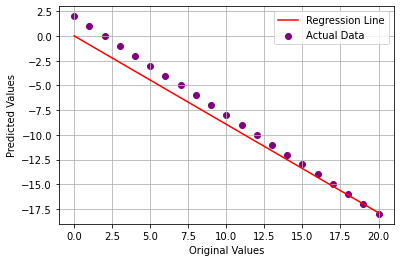

In [ ]:
hypothesis_outputs = trial[4]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

<hr>

<hr>

<hr>

<hr>

<hr>

<hr>

### **Step_4: **Update your Batch GD for one variable  implementation to be NAG and check your results

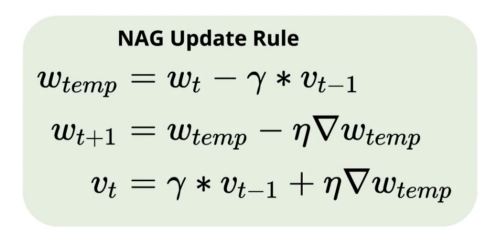

In [ ]:
def gradient_descent_NAG(x_data, y_data, alpha, gamma, itrs):

    # handling inputs
    X = x_data
    Y = y_data
    L = alpha

    # initializing variables
    theta_0 = 0
    theta_1 = 0
    step_size_0 = 0
    step_size_1 = 0
    theta_temp_0, theta_temp_1 = 0,0
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []

    for i in range(itrs):

        Y_pred = theta_0 + theta_1 * X
        theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
        theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)        
        
        theta_temp_0 = theta_0 - gamma * step_size_0
        step_size_0 = gamma * step_size_0 + L * theta0_grd
        theta_0 = theta_0 - step_size_0
        
        theta_temp_1 = theta_1 - gamma * step_size_1
        step_size_1 = gamma * step_size_1 + L * theta1_grd
        theta_1 = theta_1 - step_size_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        H = theta_0 + theta_1 * X
        hypothesis_output.append(H)

        J_val = (1/(2*len(X))) * np.sum((H - Y)**2)
        loss_list.append(J_val)

    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list

In [ ]:
trial = gradient_descent_NAG(X, Y, 0.0005, 0.9, 40)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

0.018853758929582413 -0.9020117911863379


In [ ]:
Y_pred_final = trial[4][-1]

R2_score(Y, Y_pred_final)

0.963056586280302

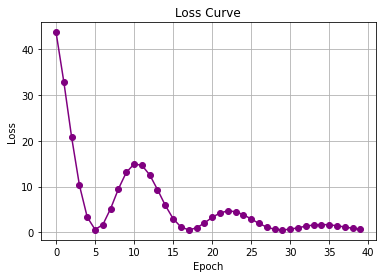

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

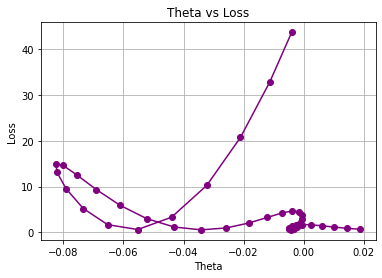

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

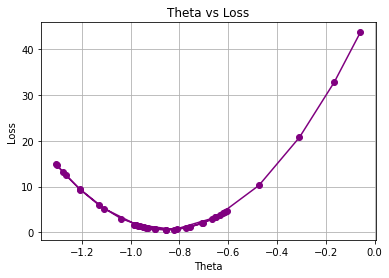

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

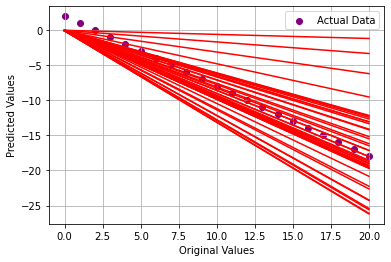

In [ ]:
hypothesis_outputs = trial[4]

plot_all_regressions(X, Y, hypothesis_outputs)

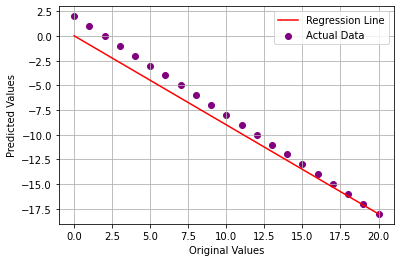

In [ ]:
hypothesis_outputs = trial[4]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [ ]:
# gamma = 0.99
trial = gradient_descent_NAG(X, Y, 0.0005, 0.99, 40)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

0.11589461247538896 -1.0985167705902528


In [ ]:
Y_pred_final = trial[4][-1]

R2_score(Y, Y_pred_final)

0.7657654981488783

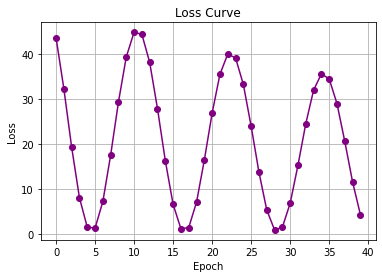

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

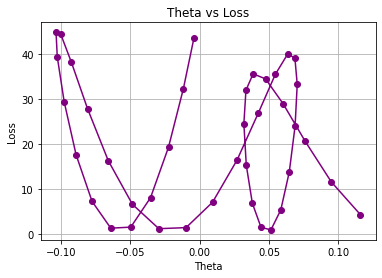

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

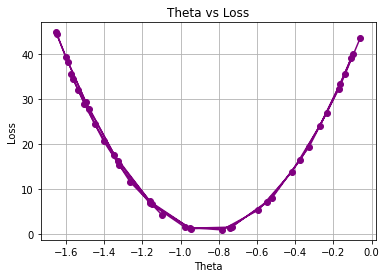

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

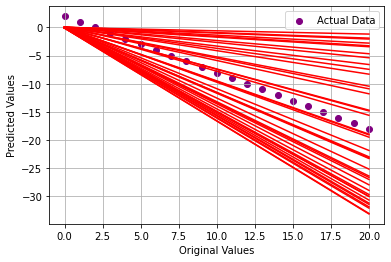

In [ ]:
hypothesis_outputs = trial[4]

plot_all_regressions(X, Y, hypothesis_outputs)

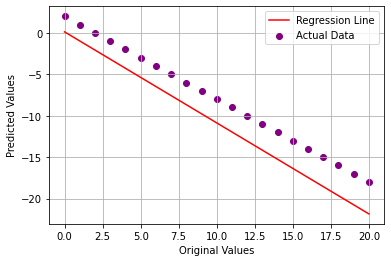

In [ ]:
hypothesis_outputs = trial[4]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [ ]:
# gamma = 0.1
trial = gradient_descent_NAG(X, Y, 0.0005, 0.1, 40)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

-0.04752446022227531 -0.8149954310310783


In [ ]:
Y_pred_final = trial[4][-1]

R2_score(Y, Y_pred_final)

0.9647097313294076

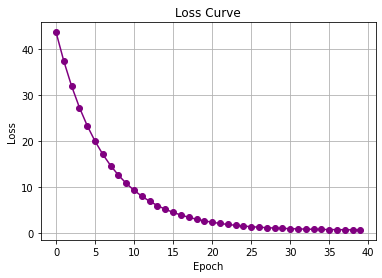

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

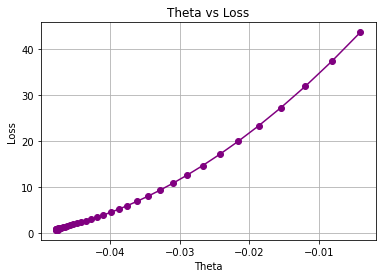

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

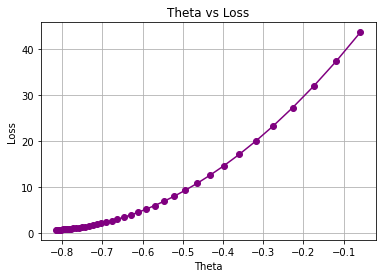

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

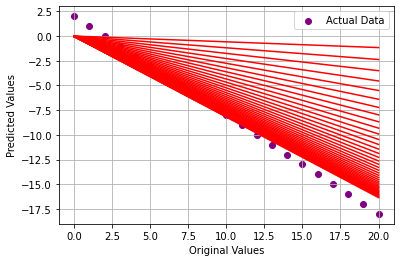

In [ ]:
hypothesis_outputs = trial[4]

plot_all_regressions(X, Y, hypothesis_outputs)

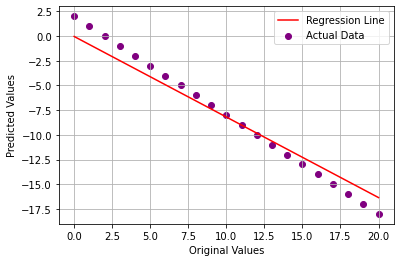

In [ ]:
hypothesis_outputs = trial[4]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

## Congratulations 


<hr>